In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df_covid_data = pd.read_csv('data/owid-covid-data.csv')
print(df_covid_data.shape)
df_covid_data.head()

(394095, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [230]:
columns_of_interest = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths',  'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'population']

In [231]:
df_covid_data = df_covid_data[columns_of_interest]
df_covid_data.head()

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,AFG,Asia,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,AFG,Asia,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,AFG,Asia,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,AFG,Asia,Afghanistan,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,AFG,Asia,Afghanistan,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


In [232]:
df_covid_data['date'] = pd.to_datetime(df_covid_data['date'])
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394095 entries, 0 to 394094
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 394095 non-null  object        
 1   continent                375252 non-null  object        
 2   location                 394095 non-null  object        
 3   date                     394095 non-null  datetime64[ns]
 4   total_cases              355165 non-null  float64       
 5   total_deaths             332773 non-null  float64       
 6   total_vaccinations       83737 non-null   float64       
 7   people_vaccinated        79569 non-null   float64       
 8   people_fully_vaccinated  76465 non-null   float64       
 9   total_boosters           51908 non-null   float64       
 10  population               394095 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 33.1+ MB


In [233]:
missing_values = round(df_covid_data.isnull().sum()/df_covid_data.shape[0]*100,1)
print(missing_values)

iso_code                    0.0
continent                   4.8
location                    0.0
date                        0.0
total_cases                 9.9
total_deaths               15.6
total_vaccinations         78.8
people_vaccinated          79.8
people_fully_vaccinated    80.6
total_boosters             86.8
population                  0.0
dtype: float64


In [234]:
df_covid_data[df_covid_data['continent'].isnull()]['location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'Low income', 'Lower middle income', 'North America', 'Oceania',
       'South America', 'Upper middle income', 'World'], dtype=object)

In [235]:
# Let's drop the rows where the continent is missing as in location we want to have the country information 
# And not other regions or categories (for simplicity)
df_covid_data.dropna(subset=['continent'], inplace = True)


We can see that for vacinations data we have a lot of missing data points. it's connected with the fact that vaccination appeared much later than covid, so it's totally fine.

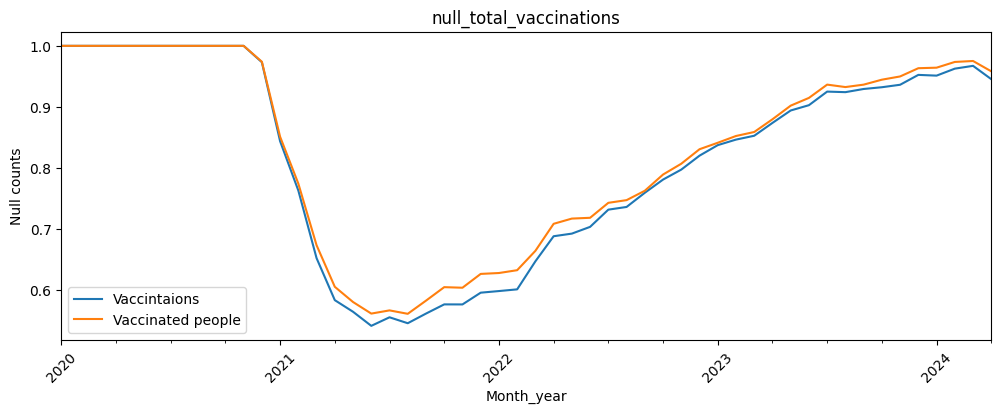

In [236]:
df_covid_data['Month_year'] = df_covid_data['date'].dt.to_period('M')

null_total_vaccinations = df_covid_data.groupby('Month_year')['total_vaccinations'].apply(lambda x: x.isnull().sum()/len(x))   
null_people_vaccinated = df_covid_data.groupby('Month_year')['people_vaccinated'].apply(lambda x: x.isnull().sum()/len(x))   

fig = plt.figure(figsize=(12, 4))
null_total_vaccinations.plot(label='Vaccintaions')
null_people_vaccinated.plot(label='Vaccinated people')
plt.xlabel('Month_year')
plt.ylabel('Null counts')
plt.title('null_total_vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.show()


That's interesting that total_vaccinations null rate is never less than 0.5. Let's see if there is any pattern in the missing values. Also, it's interesting that the null rate increases since mid 2021 while we have information about vaccinations already. Let's check total_vaccination graph 

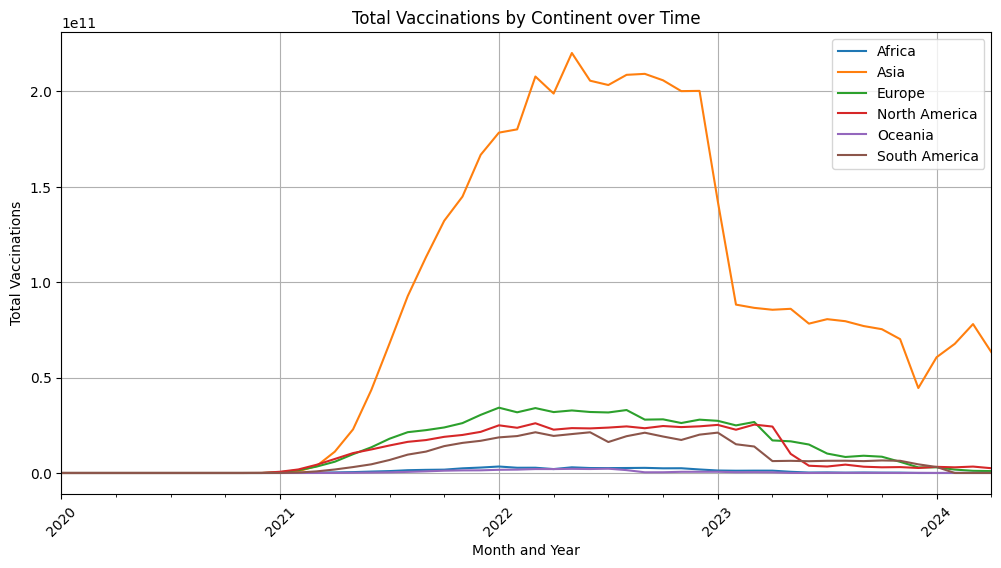

In [237]:
df_grouped = df_covid_data.groupby(['continent', 'Month_year'])['total_vaccinations'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

for continent, data in df_grouped.groupby('continent'):
    data.plot(x='Month_year', y='total_vaccinations', ax=ax, label=continent)

plt.xlabel('Month and Year')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by Continent over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

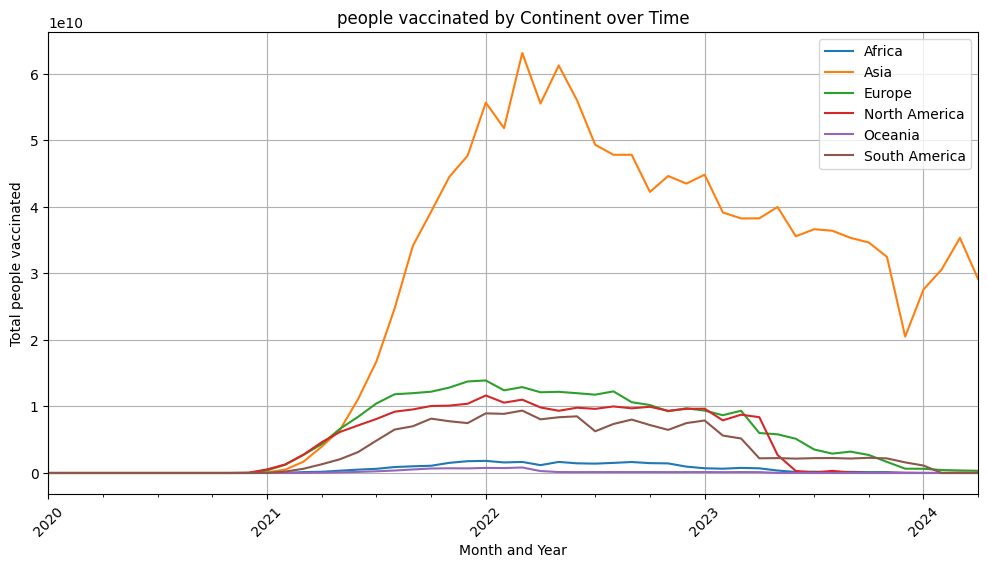

In [238]:
df_grouped = df_covid_data.groupby(['continent', 'Month_year'])['people_vaccinated'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

for continent, data in df_grouped.groupby('continent'):
    data.plot(x='Month_year', y='people_vaccinated', ax=ax, label=continent)

plt.xlabel('Month and Year')
plt.ylabel('Total people vaccinated')
plt.title('people vaccinated by Continent over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Apparently it is cummulative data as for each next month in 2021 the total number of vaccinations is increasing. However, later due to increase in missing values it started to drop. We can backfill the data by using previous availiable data. Same for vacinated people

In [239]:
df_covid_data['date'] = pd.to_datetime(df_covid_data['date'])

df_covid_data.sort_values(by=['location', 'date'], inplace=True)

df_covid_data['total_vaccinations'] = df_covid_data.groupby('location')['total_vaccinations'].fillna(method='ffill')
df_covid_data['people_vaccinated'] = df_covid_data.groupby('location')['people_vaccinated'].fillna(method='ffill')

In [240]:
#Let's backfill also for other cummulative datapoints
df_covid_data['total_cases'] = df_covid_data.groupby('location')['total_cases'].fillna(method='ffill')
df_covid_data['total_deaths'] = df_covid_data.groupby('location')['total_deaths'].fillna(method='ffill')
df_covid_data['total_boosters'] = df_covid_data.groupby('location')['total_boosters'].fillna(method='ffill')
df_covid_data['people_fully_vaccinated'] = df_covid_data.groupby('location')['people_fully_vaccinated'].fillna(method='ffill')

#remaininf nulls for cumulative data we just fill with 0 as there were no vacinations, cases, or deaths reported at that moment
cumulative_colomns = ['total_vaccinations', 'people_vaccinated', 'total_cases', 'total_deaths', 'total_boosters', 'people_fully_vaccinated']
df_covid_data[cumulative_colomns] = df_covid_data[cumulative_colomns].fillna(0)

In [241]:
df_covid_data.isnull().sum()/df_covid_data.shape[0]*100

iso_code                   0.0
continent                  0.0
location                   0.0
date                       0.0
total_cases                0.0
total_deaths               0.0
total_vaccinations         0.0
people_vaccinated          0.0
people_fully_vaccinated    0.0
total_boosters             0.0
population                 0.0
Month_year                 0.0
dtype: float64

In [242]:
df_covid_data.head()

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,Month_year
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,2020-01
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,2020-01
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,2020-01
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,2020-01
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,2020-01


In [248]:
df_covid_data[['total_cases', 'total_deaths', 'total_vaccinations', 
               'people_vaccinated', 'people_fully_vaccinated', 
               'total_boosters', 'population']] = df_covid_data[['total_cases', 'total_deaths', 'total_vaccinations', 
                                                                 'people_vaccinated', 'people_fully_vaccinated', 
                                                                 'total_boosters', 'population']].astype(int)
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375252 entries, 0 to 394094
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 375252 non-null  object        
 1   continent                375252 non-null  object        
 2   location                 375252 non-null  object        
 3   date                     375252 non-null  datetime64[ns]
 4   total_cases              375252 non-null  int64         
 5   total_deaths             375252 non-null  int64         
 6   total_vaccinations       375252 non-null  int64         
 7   people_vaccinated        375252 non-null  int64         
 8   people_fully_vaccinated  375252 non-null  int64         
 9   total_boosters           375252 non-null  int64         
 10  population               375252 non-null  int64         
 11  Month_year               375252 non-null  period[M]     
dtypes: datetime64[ns](1),

In [249]:
df_covid_data.to_csv('data/cleaned_covid_data.csv', index=False)